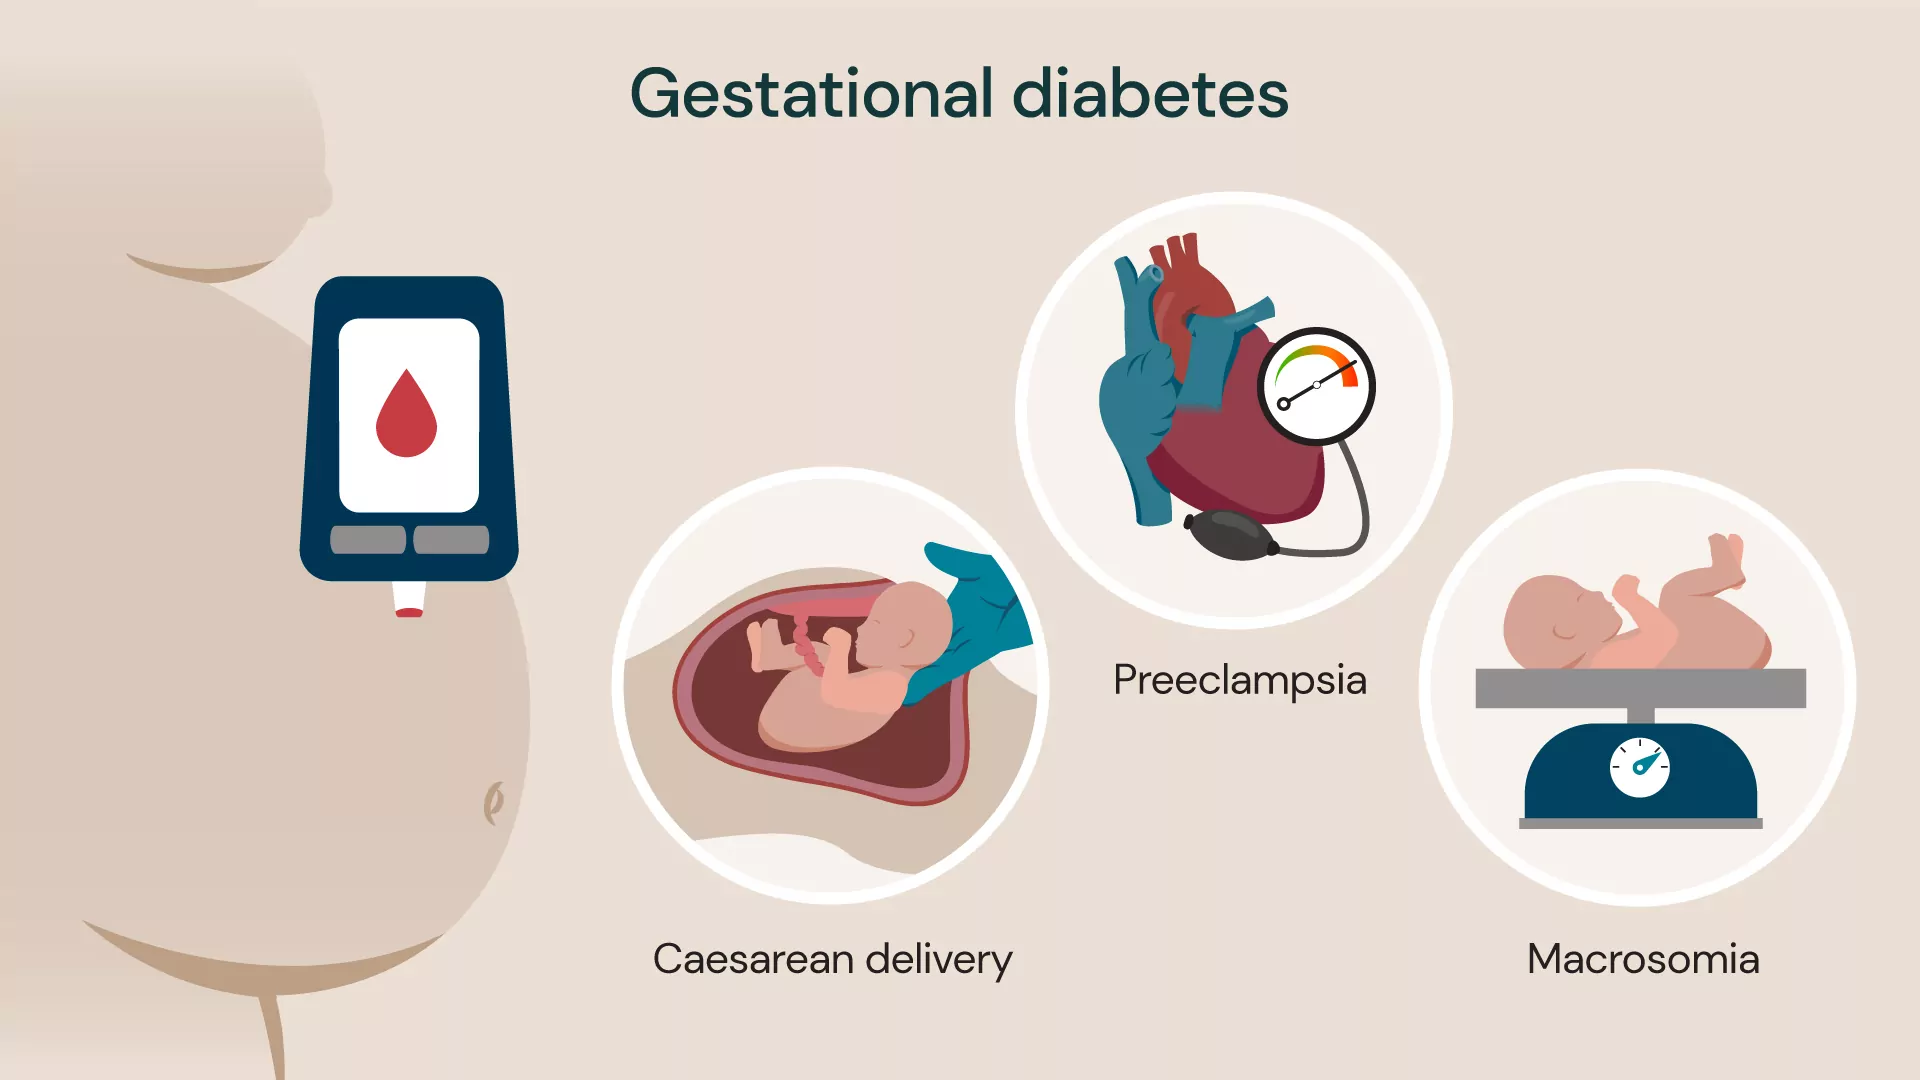

In [13]:
# Import necessary libraries for data analysis and visualization
import pandas as pd  # For data manipulation and analysis
import numpy as np   # For numerical computations
import matplotlib.pyplot as plt  # For creating static visualizations
import seaborn as sns  # For creating statistical visualizations
import plotly.express as px  # For creating interactive visualizations
import plotly.graph_objects as go  # For creating advanced interactive visualizations

In [14]:
df = pd.read_csv('/content/diabetes.csv')
df

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  Outcome  
0                       0.627   50        1  
1                       0.351   31        0  
2                       0.672   32        1  
3                       0.167   21        0  
4                       2.288   33        1  
..                        ...  ...      ...  
763                     0.171   63        0  
764                     0.340   27        0  
765                     0.245   30        0  
766                     0.349   47        1  
767                     0.315   23        0  

[768 rows x 9 columns]

In [15]:
# Display a summary of the DataFrame, including column data types and non-null counts
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [16]:
# Generate descriptive statistics for the numerical columns in the DataFrame
df.describe()

Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std       3.369578   31.972618      19.355807      15.952218  115.244002   
min       0.000000    0.000000       0.000000       0.000000    0.000000   
25%       1.000000   99.000000      62.000000       0.000000    0.000000   
50%       3.000000  117.000000      72.000000      23.000000   30.500000   
75%       6.000000  140.250000      80.000000      32.000000  127.250000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  768.000000                768.000000  768.000000  768.000000  
mean    31.992578                  0.471876   33.240885    0.348958  
std      7.884160                  0.331329   11.760232    0.476951  
min      0.000000                  0.078000   21.000000    0.000000  
25%     27.300000                  0.243750   24.000000    0.000000  
50%     32.000000                  0.372500   29.000000    0.000000  
75%     36.600000                  0.626250   41.000000    1.000000  
max     67.100000                  2.420000   81.000000    1.000000

In [17]:
# Check for missing values in the DataFrame
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [18]:
# Check for duplicated rows in the DataFrame
df.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
763    False
764    False
765    False
766    False
767    False
Length: 768, dtype: bool

In [19]:
# Define columns where zero values are invalid and should be replaced with NaN
invalid_zero_cols = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']

# Replace zero values with NaN in the specified columns
df[invalid_zero_cols] = df[invalid_zero_cols].replace(0, np.nan)

# Check for missing values in the DataFrame after replacement
df.isnull().sum()

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

In [20]:
# Loop through each column in the list of columns with invalid zeros
for col in invalid_zero_cols:
    # Calculate the median of the column (ignoring NaN values)
    median = df[col].median()

    # Fill missing values (NaN) in the column with the calculated median
    df[col].fillna(median, inplace=True)

<ipython-input-20-90d32389b79c>:7: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.





In [21]:
# Check for missing values in the DataFrame after handling invalid zeros
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [23]:
import plotly.io as pio
pio.renderers.default = 'colab'
# Loop through each column in the DataFrame, excluding the target variable 'Outcome'
for col in df.columns[:-1]:  # df.columns[:-1] excludes the last column ('Outcome')
    # Create a box plot using Plotly Express
    fig = px.box(
        df,  # DataFrame to use
        y=col,  # Column to plot on the y-axis
        title=f'Box plot of {col}'  # Title of the plot, dynamically including the column name
    )
    # Display the plot
    fig.show()

In [24]:
# Create a copy of the original DataFrame to apply log transformation
df_log_transformed = df.copy()

# Define the list of features to apply log transformation
features_to_transform = ['BloodPressure', 'Insulin', 'BMI', 'SkinThickness']

# Loop through each feature and apply log transformation
for feature in features_to_transform:
    # Apply log transformation using np.log1p (log of 1 + x) to handle zero values
    df_log_transformed[feature + '_log'] = np.log1p(df_log_transformed[feature])

# Display the transformed DataFrame
df_log_transformed

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6    148.0           72.0           35.0    125.0  33.6   
1              1     85.0           66.0           29.0    125.0  26.6   
2              8    183.0           64.0           29.0    125.0  23.3   
3              1     89.0           66.0           23.0     94.0  28.1   
4              0    137.0           40.0           35.0    168.0  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10    101.0           76.0           48.0    180.0  32.9   
764            2    122.0           70.0           27.0    125.0  36.8   
765            5    121.0           72.0           23.0    112.0  26.2   
766            1    126.0           60.0           29.0    125.0  30.1   
767            1     93.0           70.0           31.0    125.0  30.4   

     DiabetesPedigreeFunction  Age  Outcome  BloodPressure_log  Insulin_log  \
0                       0.627   50        1           4.290459     4.836282   
1                       0.351   31        0           4.204693     4.836282   
2                       0.672   32        1           4.174387     4.836282   
3                       0.167   21        0           4.204693     4.553877   
4                       2.288   33        1           3.713572     5.129899   
..                        ...  ...      ...                ...          ...   
763                     0.171   63        0           4.343805     5.198497   
764                     0.340   27        0           4.262680     4.836282   
765                     0.245   30        0           4.290459     4.727388   
766                     0.349   47        1           4.110874     4.836282   
767                     0.315   23        0           4.262680     4.836282   

      BMI_log  SkinThickness_log  
0    3.543854           3.583519  
1    3.317816           3.401197  
2    3.190476           3.401197  
3    3.370738           3.178054  
4    3.786460           3.583519  
..        ...                ...  
763  3.523415           3.891820  
764  3.632309           3.332205  
765  3.303217           3.178054  
766  3.437208           3.401197  
767  3.446808           3.465736  

[768 rows x 13 columns]

In [25]:
# Import the StandardScaler class from scikit-learn
from sklearn.preprocessing import StandardScaler

In [26]:
# Initialize the StandardScaler
scaler = StandardScaler()

# Fit the scaler to the features (excluding the target variable 'Outcome') and transform them
scaled_features = scaler.fit_transform(df.drop('Outcome', axis=1))

In [27]:
# Convert the scaled features (NumPy array) back to a DataFrame
df_scaled = pd.DataFrame(scaled_features, columns=df.columns[:-1])

# Add the target variable 'Outcome' back to the scaled DataFrame
df_scaled['Outcome'] = df['Outcome'].reset_index(drop=True)

In [28]:
# Loop through each column in the DataFrame, excluding the target variable 'Outcome'
for col in df.columns[:-1]:
    # Create a histogram using Plotly Express
    fig = px.histogram(
        df,  # DataFrame to use
        x=col,  # Column to plot on the x-axis
        title=f'Distribution of {col}'  # Title of the plot, dynamically including the column name
    )
    # Display the plot
    fig.show()

In [29]:
# Loop through each column in the DataFrame, excluding the target variable 'Outcome'
for col in df.columns[:-1]:
    # Create a density histogram with a box plot using Plotly Express
    fig = px.histogram(
        df,  # DataFrame to use
        x=col,  # Column to plot on the x-axis
        nbins=50,  # Number of bins for the histogram
        marginal='box',  # Add a box plot on the side
        histnorm='density',  # Normalize the histogram to show density
        title=f'Density Plot of {col}'  # Title of the plot, dynamically including the column name
    )
    # Display the plot
    fig.show()

In [30]:
# Calculate the correlation matrix for the DataFrame
corr_matrix = df.corr()

# Create a heatmap using Plotly's graph_objects (go)
fig = go.Figure(data=go.Heatmap(
    z=corr_matrix.values,  # Correlation values
    x=corr_matrix.columns,  # Column names for the x-axis
    y=corr_matrix.columns,  # Column names for the y-axis
    colorscale='Viridis'  # Color scale for the heatmap
))

# Update the layout of the heatmap
fig.update_layout(
    title='Correlation Heatmap',  # Title of the heatmap
    xaxis_nticks=36  # Number of ticks on the x-axis
)

# Display the heatmap
fig.show()

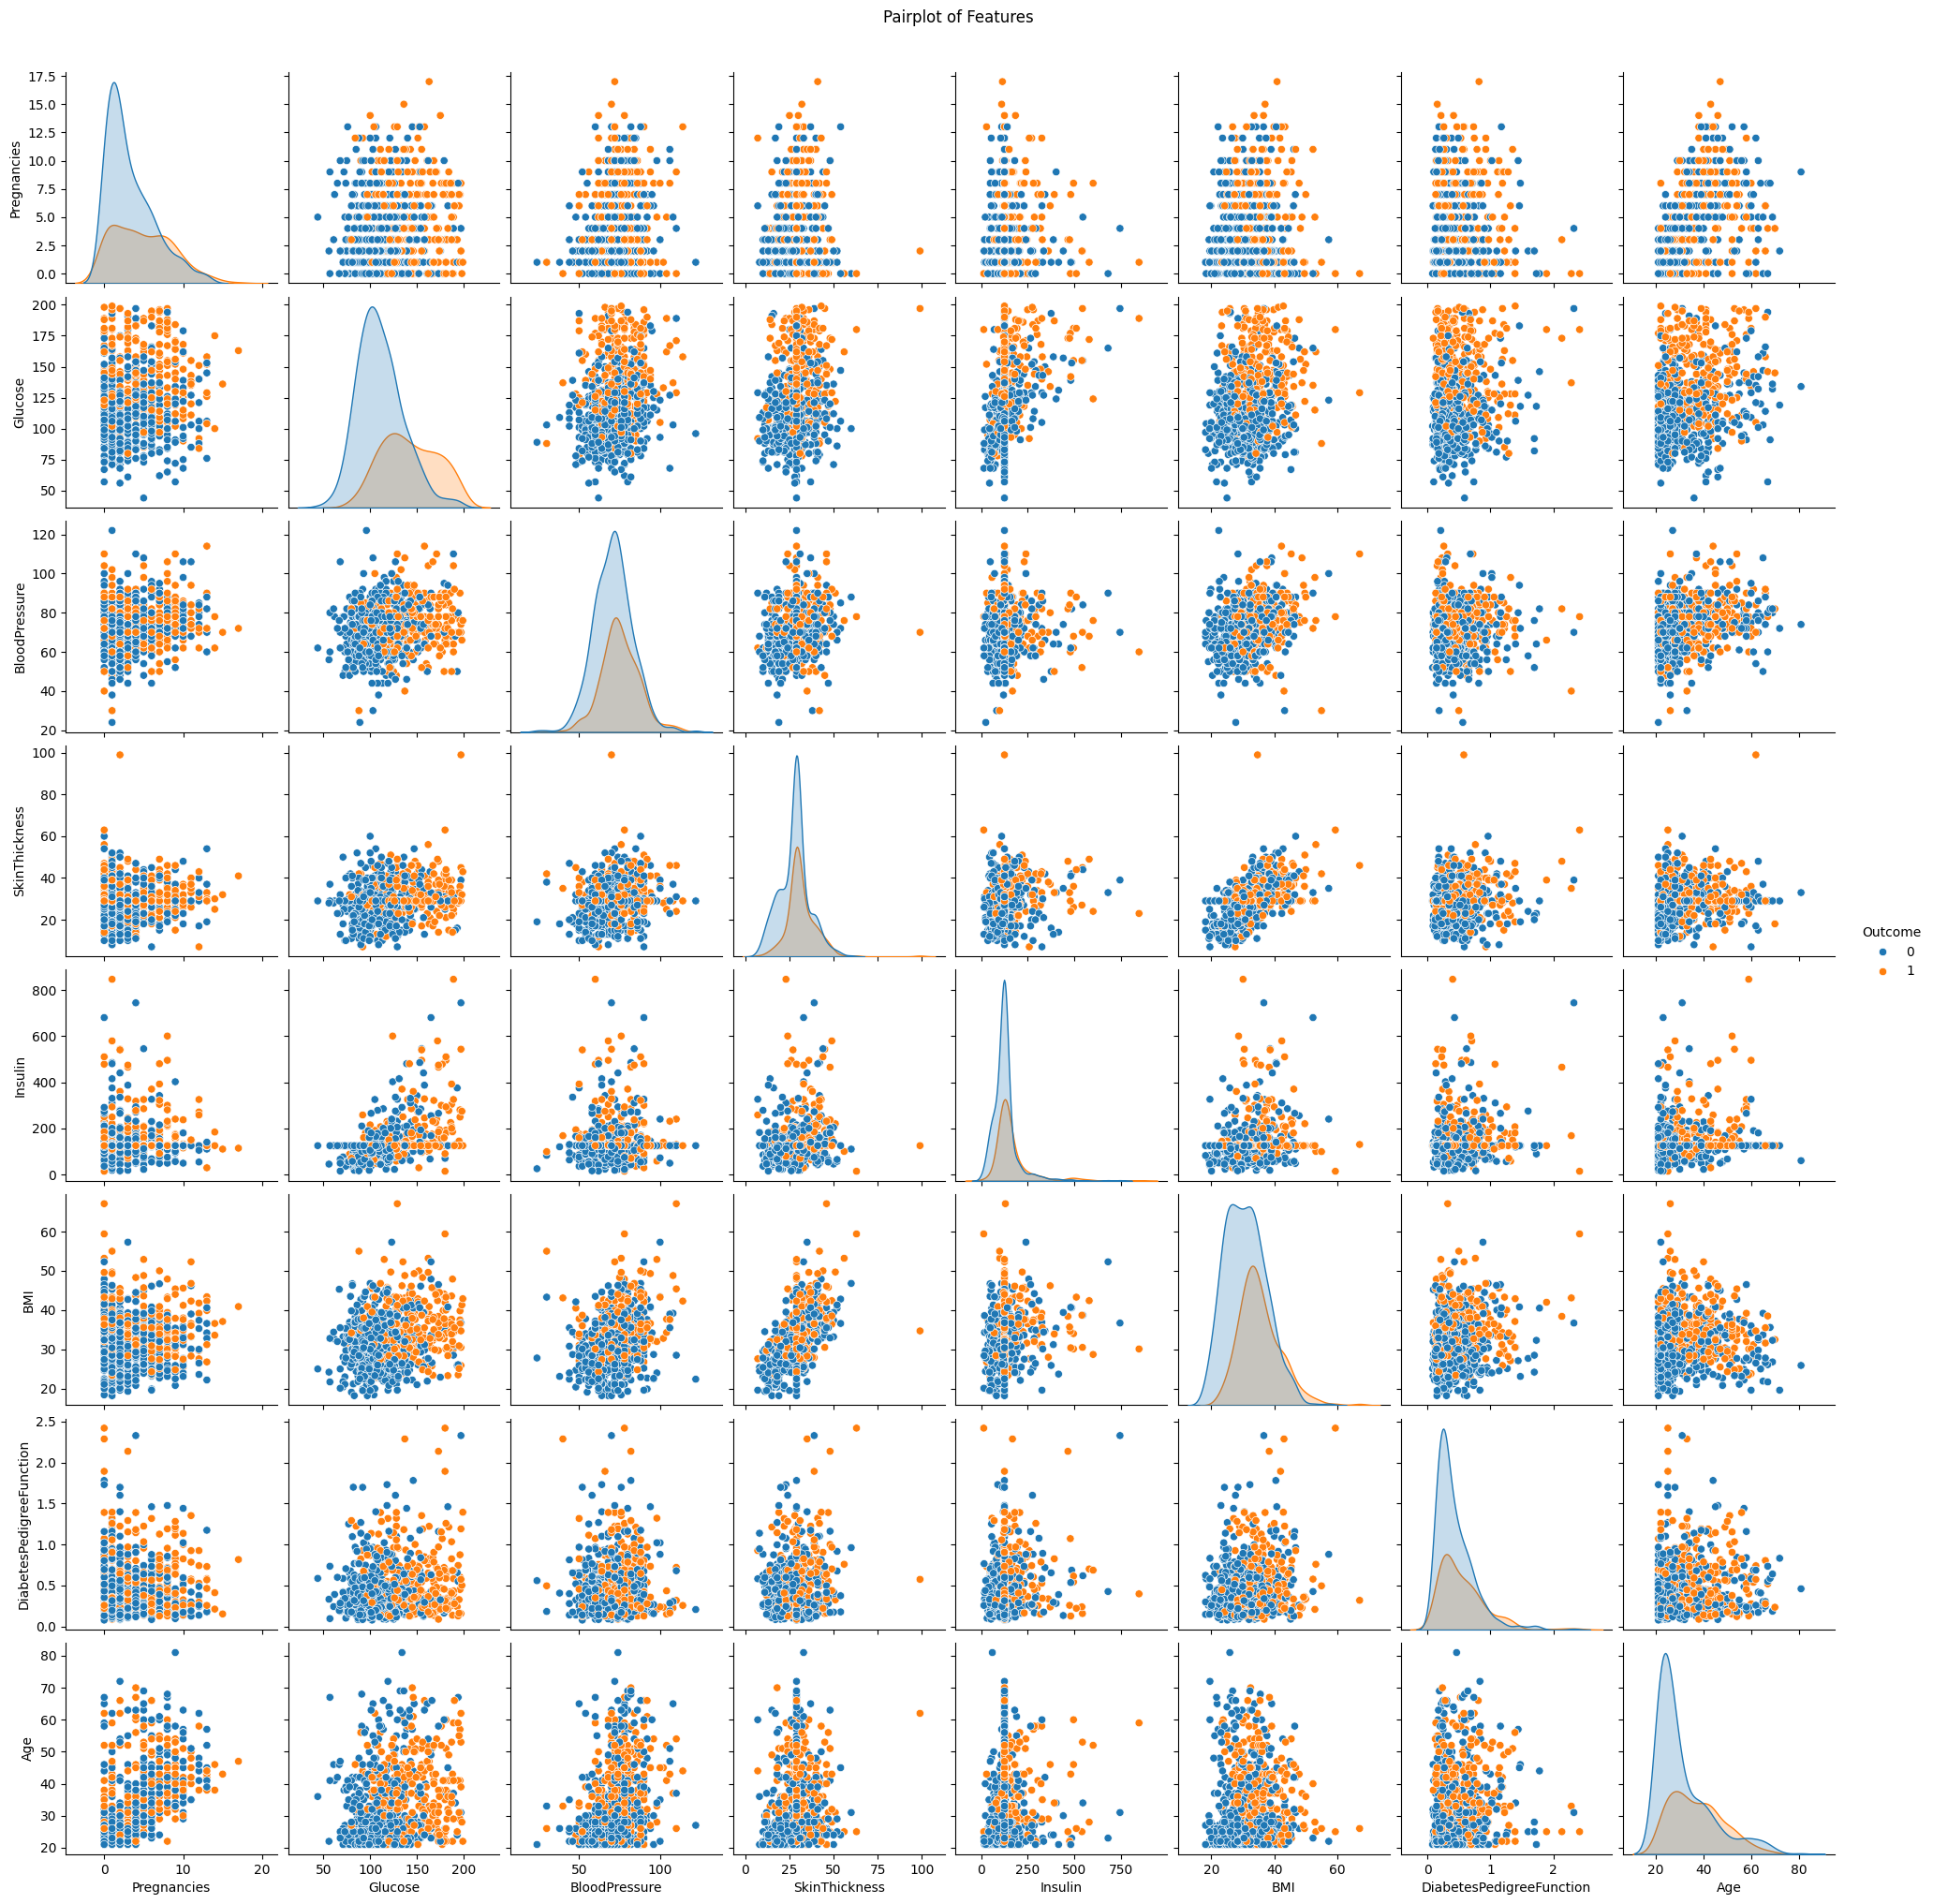

In [31]:
# Create a pairplot using Seaborn
sns.pairplot(
    df,  # DataFrame to use
    hue='Outcome',  # Color the plots based on the 'Outcome' column
    diag_kind='kde'  # Use kernel density estimation (KDE) for diagonal plots
)

# Add a title to the pairplot
plt.suptitle('Pairplot of Features', y=1.02)

# Display the pairplot
plt.show()

In [32]:
# Loop through each column in the DataFrame, excluding the target variable 'Outcome'
for col in df.columns[:-1]:
    # Create a box plot using Plotly Express
    fig = px.box(
        df,  # DataFrame to use
        x='Outcome',  # Column to plot on the x-axis (categorical variable)
        y=col,  # Column to plot on the y-axis (numerical variable)
        color='Outcome',  # Color the boxes based on the 'Outcome' column
        title=f'{col} vs Outcome'  # Title of the plot, dynamically including the column name
    )
    # Display the plot
    fig.show()

In [33]:
# Create a histogram using Plotly Express
fig = px.histogram(
    df,  # DataFrame to use
    x='Age',  # Column to plot on the x-axis
    nbins=20,  # Number of bins for the histogram
    color='Outcome',  # Color the bars based on the 'Outcome' column
    barmode='overlay',  # Overlay the histograms for each 'Outcome' group
    title='Age Distribution by Outcome'  # Title of the plot
)

# Display the plot
fig.show()

In [34]:
# Create a scatter plot using Plotly Express
fig = px.scatter(
    df,  # DataFrame to use
    x='Glucose',  # Column to plot on the x-axis
    y='Insulin',  # Column to plot on the y-axis
    color='Outcome',  # Color the points based on the 'Outcome' column
    title='Glucose vs Insulin by Outcome'  # Title of the plot
)

# Display the plot
fig.show()

In [35]:
# Import Plotly's figure_factory module for advanced visualizations
import plotly.figure_factory as ff

# Select a subset of columns for the scatterplot matrix
sample_df = df[['Glucose', 'BMI', 'Age', 'Insulin', 'Outcome']]

# Create a scatterplot matrix using Plotly's figure_factory
fig = ff.create_scatterplotmatrix(
    sample_df,  # DataFrame to use
    diag='box',  # Use box plots for the diagonal
    index='Outcome',  # Color the points based on the 'Outcome' column
    height=800,  # Set the height of the plot
    width=800  # Set the width of the plot
)

# Display the plot
fig.show()

In [36]:
# Create a scatter plot using Plotly Express
fig = px.scatter(
    df,  # DataFrame to use
    x='SkinThickness',  # Column to plot on the x-axis
    y='DiabetesPedigreeFunction',  # Column to plot on the y-axis
    color='Outcome',  # Color the points based on the 'Outcome' column
    title='Skin Thickness vs Diabetes Pedigree Function by Outcome',  # Title of the plot
    labels={
        'SkinThickness': 'Skin Thickness (mm)',  # Custom label for the x-axis
        'DiabetesPedigreeFunction': 'Diabetes Pedigree Function'  # Custom label for the y-axis
    }
)

# Customize the appearance of the markers
fig.update_traces(
    marker=dict(
        size=10,  # Set the size of the markers
        line=dict(width=2, color='DarkSlateGrey')  # Add a border to the markers
    )
)

# Display the plot
fig.show()

In [37]:
# Create a scatter plot using Plotly Express
fig = px.scatter(
    df,  # DataFrame to use
    x='BMI',  # Column to plot on the x-axis (Body Mass Index)
    y='Glucose',  # Column to plot on the y-axis (Glucose Level)
    color='Outcome',  # Color the points based on the 'Outcome' column
    title='BMI vs Glucose by Outcome',  # Title of the plot
    labels={
        'BMI': 'Body Mass Index',  # Custom label for the x-axis
        'Glucose': 'Glucose Level'  # Custom label for the y-axis
    },
    trendline='ols'  # Add a linear trendline using ordinary least squares (OLS) regression
)

# Display the plot
fig.show()

In [38]:
# Create a scatter plot using Plotly Express
fig = px.scatter(
    df,  # DataFrame to use
    x='Age',  # Column to plot on the x-axis (Age in years)
    y='Pregnancies',  # Column to plot on the y-axis (Number of Pregnancies)
    color='Outcome',  # Color the points based on the 'Outcome' column
    title='Age vs Pregnancies by Outcome',  # Title of the plot
    labels={
        'Age': 'Age (Years)',  # Custom label for the x-axis
        'Pregnancies': 'Number of Pregnancies'  # Custom label for the y-axis
    },
    size='Pregnancies',  # Use the 'Pregnancies' column to set the size of the points
    hover_data=['Glucose']  # Add 'Glucose' level as additional hover information
)

# Display the plot
fig.show()

In [39]:
# Create a histogram using Plotly Express
fig = px.histogram(
    df,  # DataFrame to use
    x='Glucose',  # Column to plot on the x-axis (Glucose Level)
    color='Outcome',  # Color the bars based on the 'Outcome' column
    barmode='overlay',  # Overlay the histograms for each 'Outcome' group
    title='Glucose Distribution by Outcome',  # Title of the plot
    labels={'Glucose': 'Glucose Level'}  # Custom label for the x-axis
)

# Display the plot
fig.show()

In [40]:
# Create a 3D scatter plot
fig = px.scatter_3d(
    df,  # DataFrame
    x='Glucose',  # X-axis: Glucose
    y='BMI',  # Y-axis: BMI
    z='Age',  # Z-axis: Age
    color='Outcome',  # Color by Outcome
    title='3D Scatter Plot: Glucose, BMI, and Age by Outcome'
)

# Display the plot
fig.show()

In [41]:
# Create a violin plot
fig = px.violin(
    df,  # DataFrame
    y='Glucose',  # Y-axis: Glucose
    x='Outcome',  # X-axis: Outcome
    color='Outcome',  # Color by Outcome
    title='Glucose Distribution by Outcome (Violin Plot)'
)

# Display the plot
fig.show()

In [42]:
# Create a pair plot
fig = px.scatter_matrix(
    df,  # DataFrame
    dimensions=['Glucose', 'BMI', 'Age', 'Insulin'],  # Columns to include
    color='Outcome',  # Color by Outcome
    title='Pair Plot of Features by Outcome'
)

# Display the plot
fig.show()

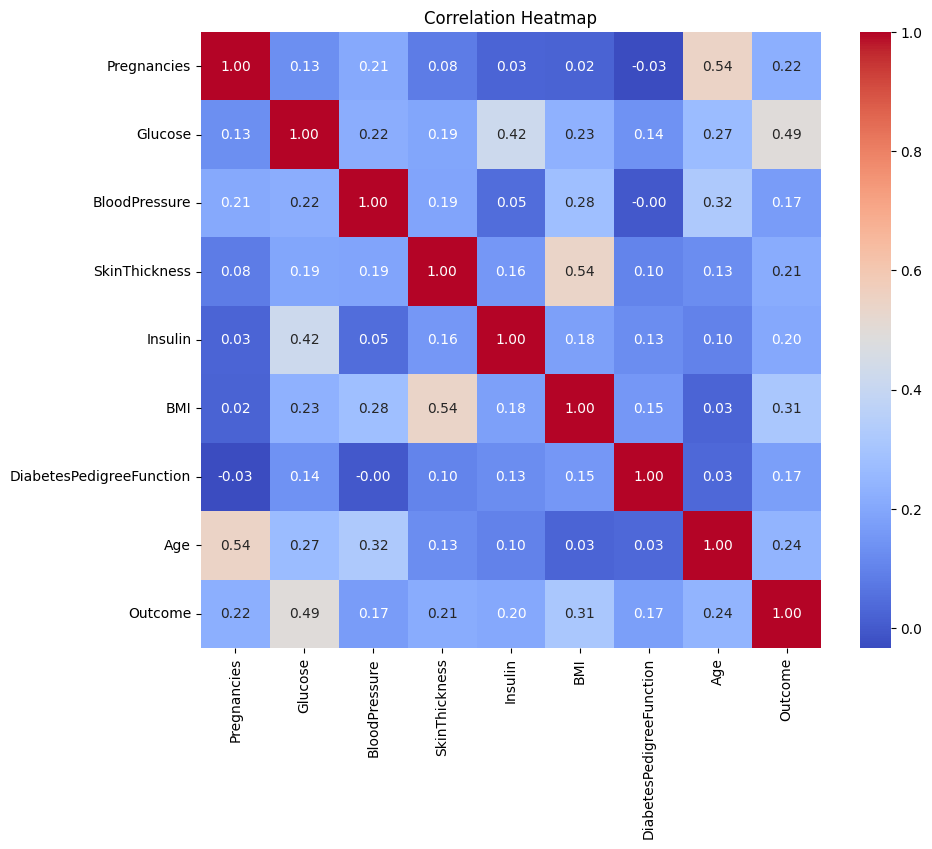

In [43]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the correlation matrix
corr_matrix = df.corr()

# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

In [44]:
# Create a pie chart
fig = px.pie(
    df,  # DataFrame
    names='Outcome',  # Column to use for categories
    title='Distribution of Outcome'
)

# Display the plot
fig.show()

In [45]:
# Create a line plot
fig = px.line(
    df,  # DataFrame
    x='Age',  # X-axis: Age
    y='Glucose',  # Y-axis: Glucose
    color='Outcome',  # Color by Outcome
    title='Glucose Levels by Age and Outcome'
)

# Display the plot
fig.show()

In [46]:
# Create a bar plot
fig = px.bar(
    df,  # DataFrame
    x='Outcome',  # X-axis: Outcome
    y='Glucose',  # Y-axis: Glucose
    color='Outcome',  # Color by Outcome
    title='Average Glucose Levels by Outcome'
)

# Display the plot
fig.show()

In [47]:
# Create a density contour plot
fig = px.density_contour(
    df,  # DataFrame
    x='Glucose',  # X-axis: Glucose
    y='BMI',  # Y-axis: BMI
    color='Outcome',  # Color by Outcome
    title='Density Contour Plot: Glucose vs BMI by Outcome'
)

# Display the plot
fig.show()

In [48]:
# Create a parallel coordinates plot
fig = px.parallel_coordinates(
    df,  # DataFrame
    color='Outcome',  # Color by Outcome
    dimensions=['Glucose', 'BMI', 'Age', 'Insulin'],  # Columns to include
    title='Parallel Coordinates Plot'
)

# Display the plot
fig.show()

In [49]:
# Create a sunburst chart
fig = px.sunburst(
    df,  # DataFrame
    path=['Outcome', 'Age'],  # Hierarchy: Outcome -> Age
    values='Glucose',  # Values: Glucose
    title='Sunburst Chart: Glucose by Outcome and Age'
)

# Display the plot
fig.show()

<ipython-input-50-6638501d82fc>:6: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




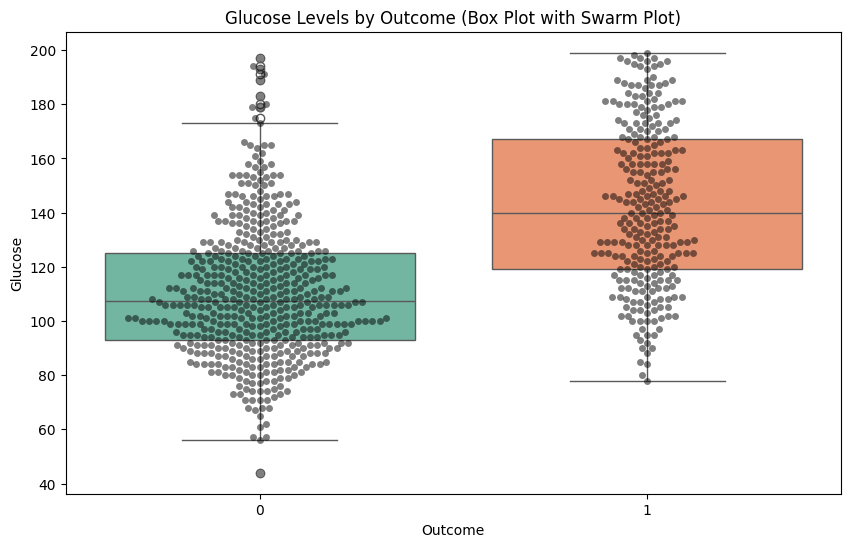

In [50]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a box plot with swarm plot
plt.figure(figsize=(10, 6))
sns.boxplot(x='Outcome', y='Glucose', data=df, palette='Set2')
sns.swarmplot(x='Outcome', y='Glucose', data=df, color='black', alpha=0.5)
plt.title('Glucose Levels by Outcome (Box Plot with Swarm Plot)')
plt.show()

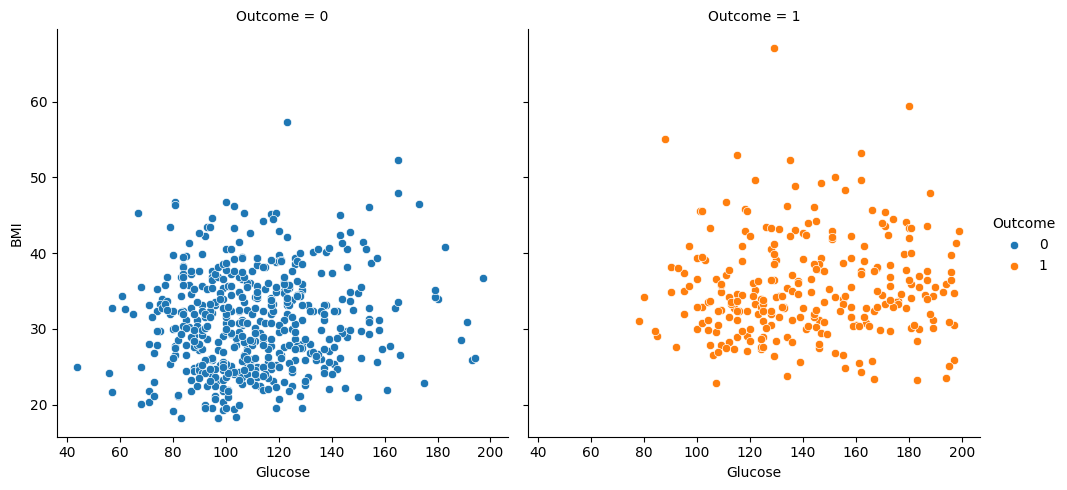

In [51]:
# Create a facet grid
g = sns.FacetGrid(df, col='Outcome', hue='Outcome', height=5)
g.map(sns.scatterplot, 'Glucose', 'BMI')
g.add_legend()
plt.show()

In [52]:
# Create a hexbin plot
fig = px.density_heatmap(
    df,  # DataFrame
    x='Glucose',  # X-axis: Glucose
    y='BMI',  # Y-axis: BMI
    nbinsx=20,  # Number of bins for x-axis
    nbinsy=20,  # Number of bins for y-axis
    title='Hexbin Plot: Glucose vs BMI'
)

# Display the plot
fig.show()

In [53]:
import plotly.express as px
import pandas as pd

# Create a sample DataFrame for Radar Chart
radar_df = df.groupby('Outcome').mean().reset_index()

# Create a Radar Chart
fig = px.line_polar(radar_df, r='Glucose', theta='Outcome', line_close=True, title='Radar Chart: Glucose by Outcome')
fig.show()

In [54]:
# Create a Bubble Plot
fig = px.scatter(
    df,  # DataFrame
    x='Glucose',  # X-axis: Glucose
    y='BMI',  # Y-axis: BMI
    size='Age',  # Size of bubbles: Age
    color='Outcome',  # Color by Outcome
    title='Bubble Plot: Glucose vs BMI (Size by Age)'
)

# Display the plot
fig.show()

In [55]:
# Create a Tree Map
fig = px.treemap(
    df,  # DataFrame
    path=['Outcome', 'Age'],  # Hierarchy: Outcome -> Age
    values='Glucose',  # Values: Glucose
    title='Tree Map: Glucose by Outcome and Age'
)

# Display the plot
fig.show()

In [56]:
# Create a Polar Chart
fig = px.scatter_polar(
    df,  # DataFrame
    r='Glucose',  # Radial axis: Glucose
    theta='Age',  # Angular axis: Age
    color='Outcome',  # Color by Outcome
    title='Polar Chart: Glucose vs Age by Outcome'
)

# Display the plot
fig.show()

In [57]:
# Create an Area Chart
fig = px.area(
    df,  # DataFrame
    x='Age',  # X-axis: Age
    y='Glucose',  # Y-axis: Glucose
    color='Outcome',  # Color by Outcome
    title='Area Chart: Glucose vs Age by Outcome'
)

# Display the plot
fig.show()

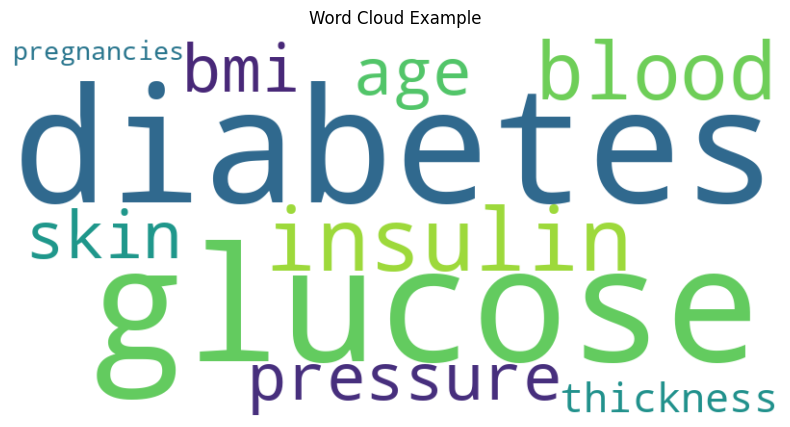

In [58]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Sample text data
text = "diabetes glucose insulin blood pressure bmi age skin thickness pregnancies"

# Create a Word Cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

# Display the Word Cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud Example')
plt.show()

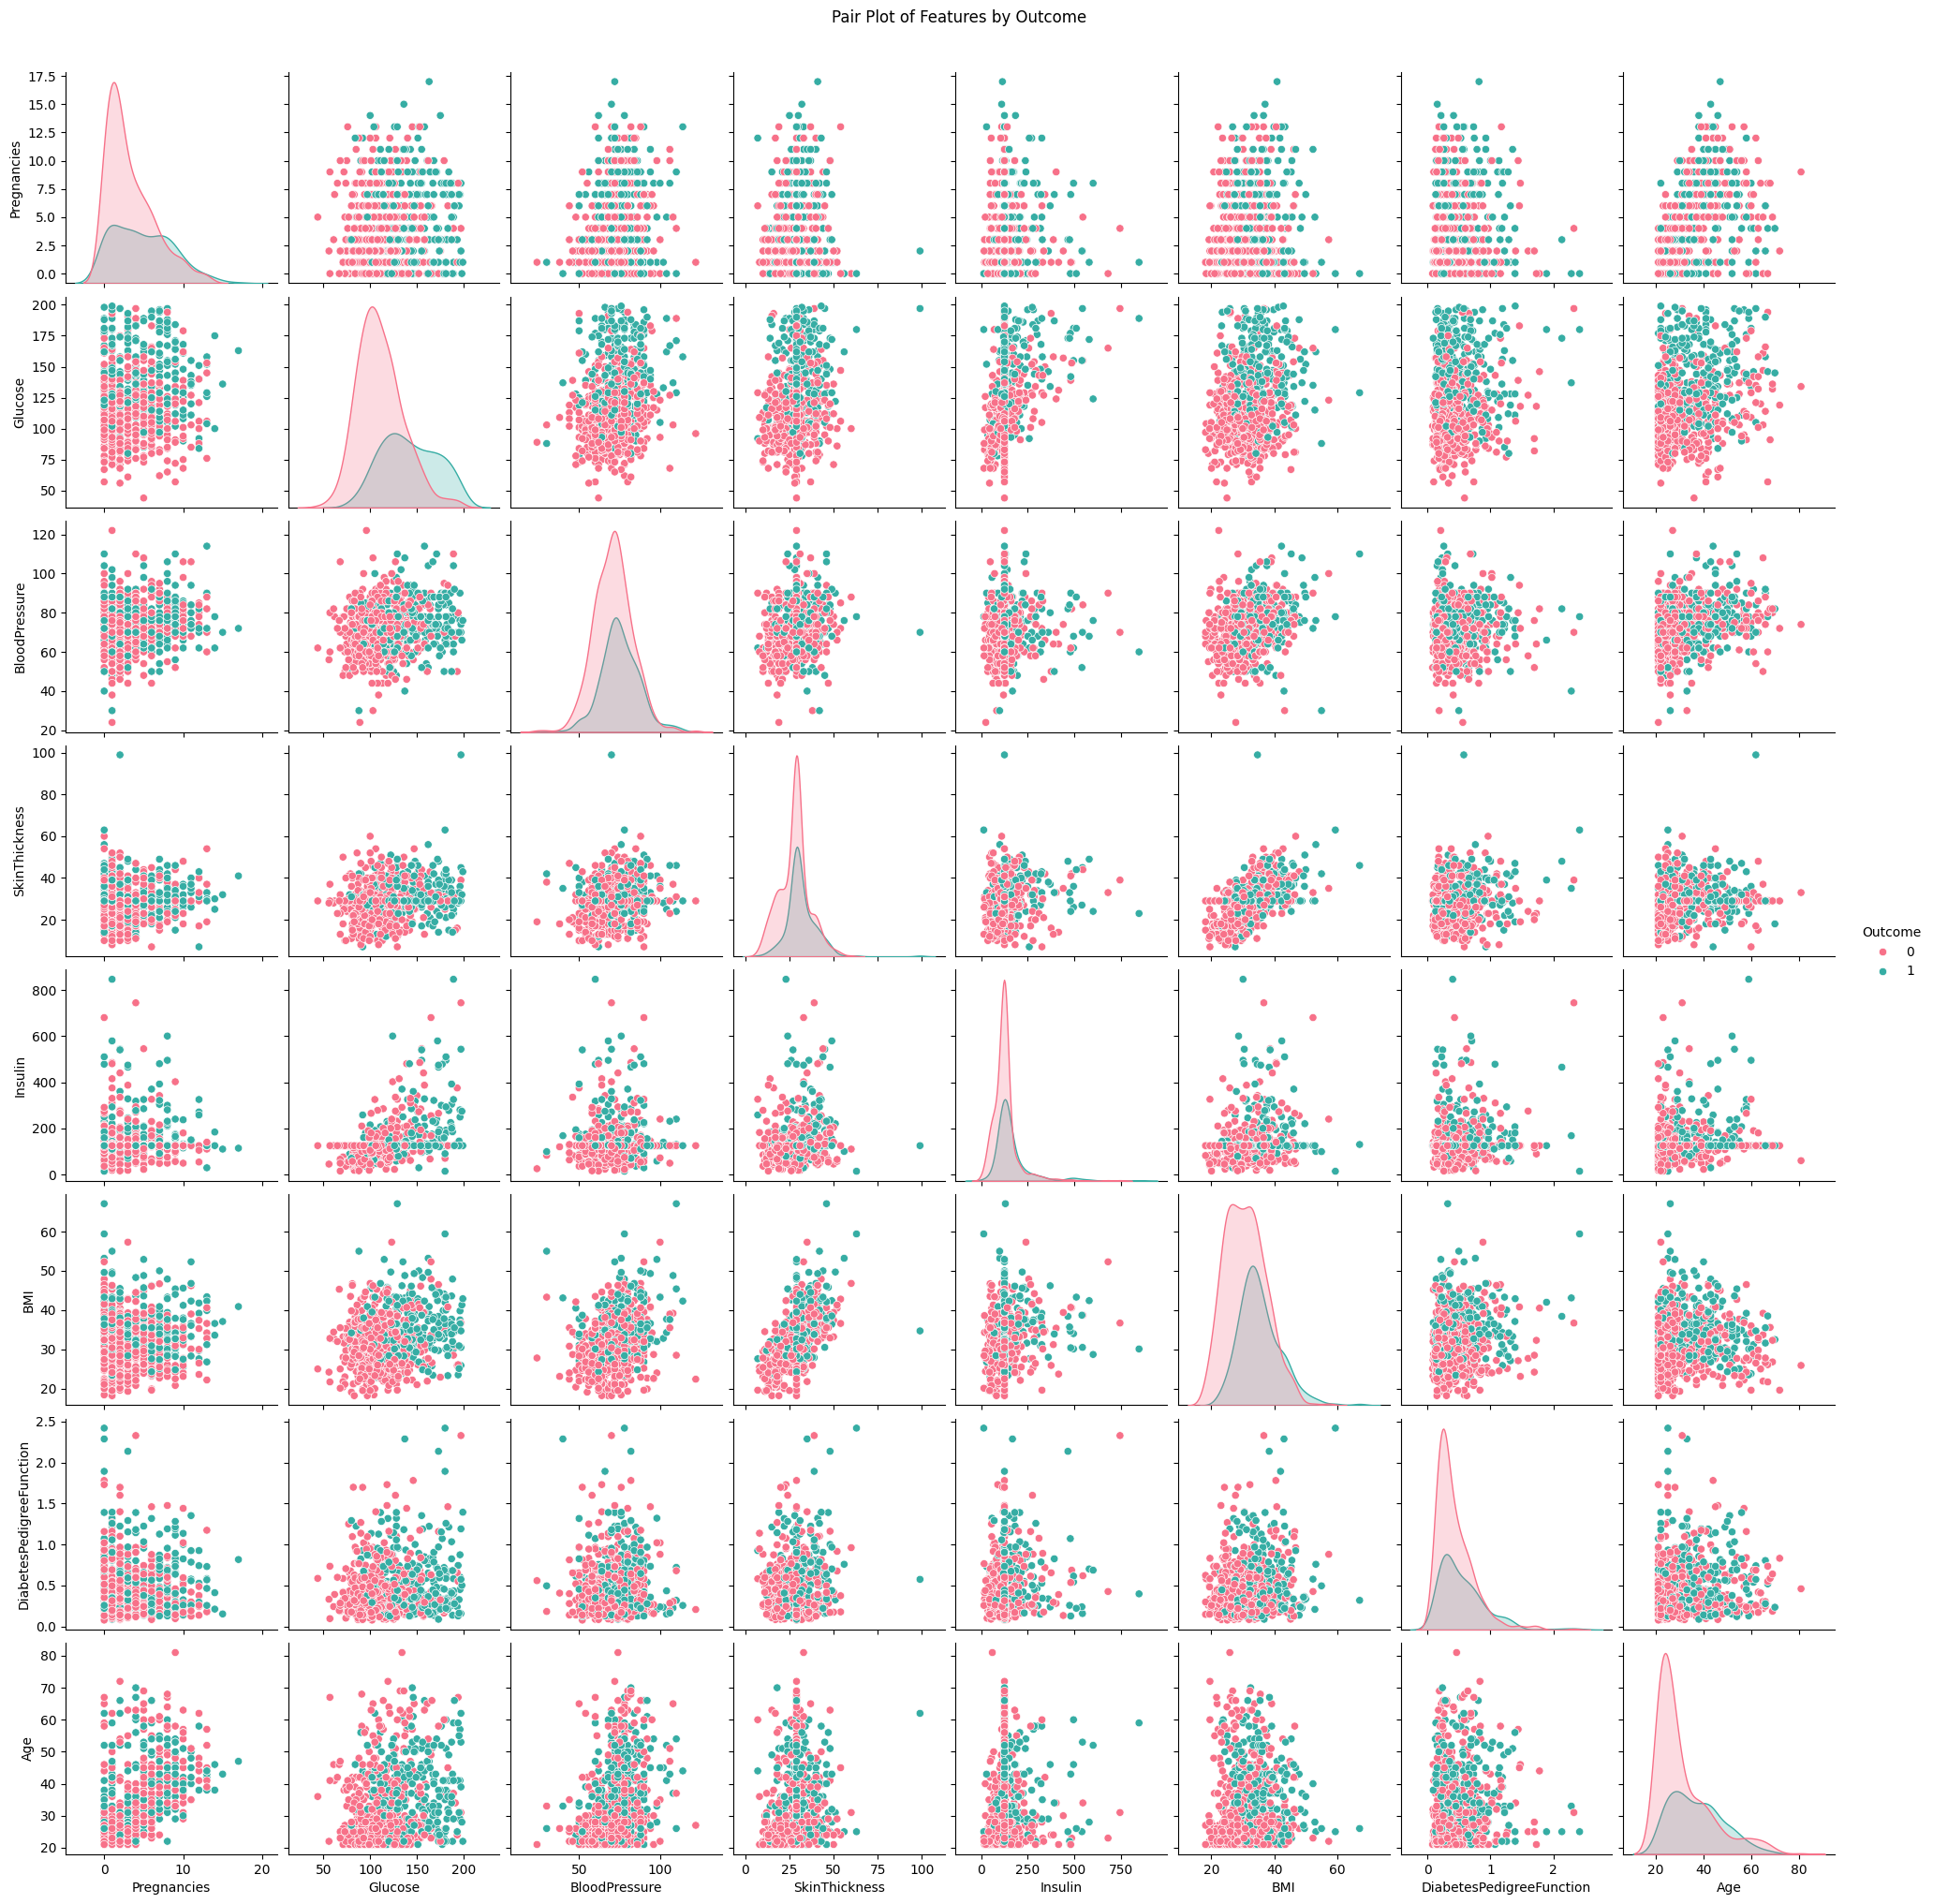

In [60]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a Pair Plot
sns.pairplot(df, hue='Outcome', diag_kind='kde', palette='husl')
plt.suptitle('Pair Plot of Features by Outcome', y=1.02)
plt.show()

<ipython-input-61-fc0be8a59262>:3: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




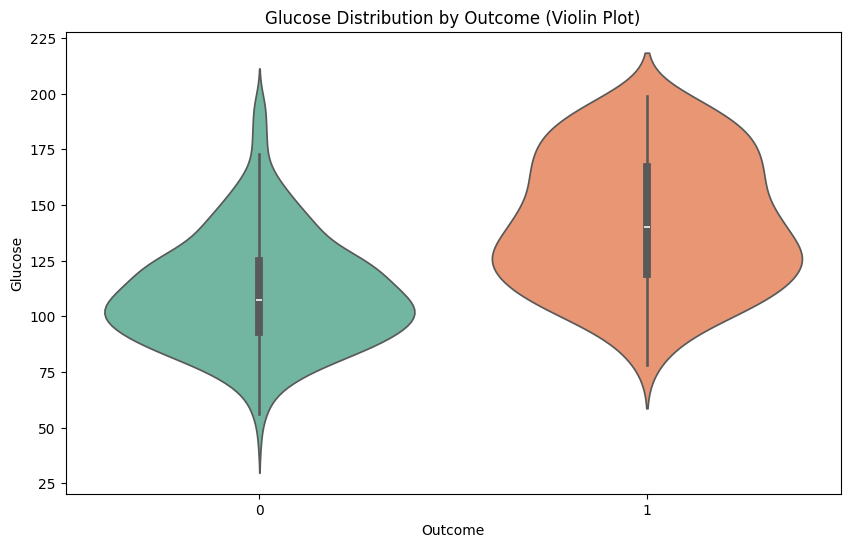

In [61]:
# Create a Violin Plot
plt.figure(figsize=(10, 6))
sns.violinplot(x='Outcome', y='Glucose', data=df, palette='Set2')
plt.title('Glucose Distribution by Outcome (Violin Plot)')
plt.show()

<ipython-input-62-42799e81a20d>:3: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




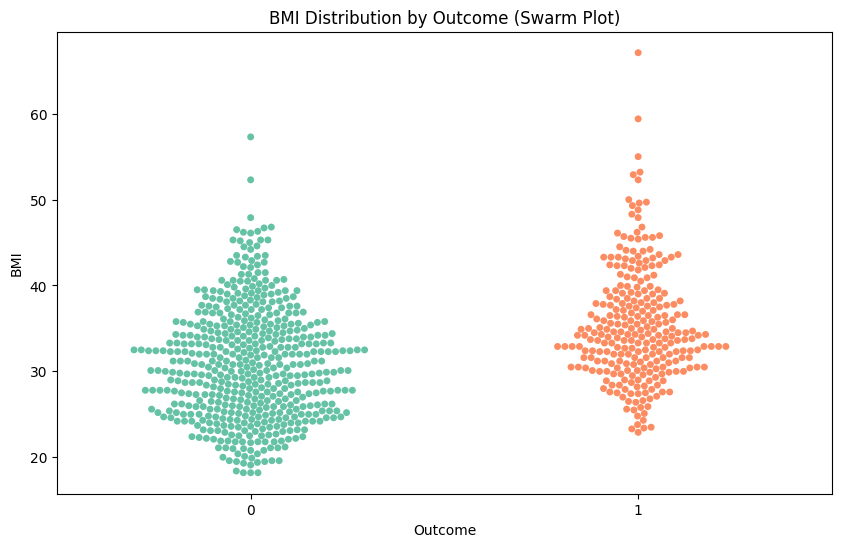

In [62]:
# Create a Swarm Plot
plt.figure(figsize=(10, 6))
sns.swarmplot(x='Outcome', y='BMI', data=df, palette='Set2')
plt.title('BMI Distribution by Outcome (Swarm Plot)')
plt.show()

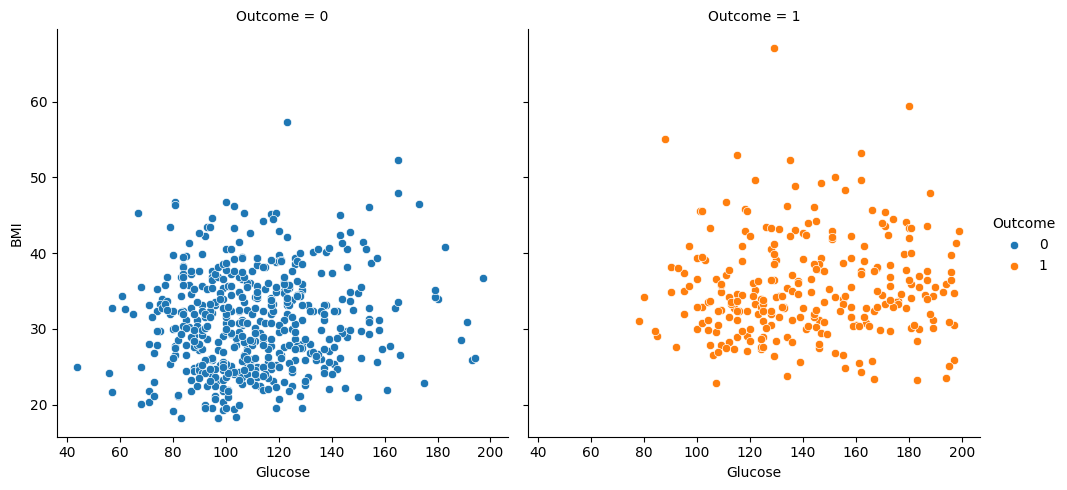

In [63]:
# Create a Facet Grid
g = sns.FacetGrid(df, col='Outcome', hue='Outcome', height=5)
g.map(sns.scatterplot, 'Glucose', 'BMI')
g.add_legend()
plt.show()

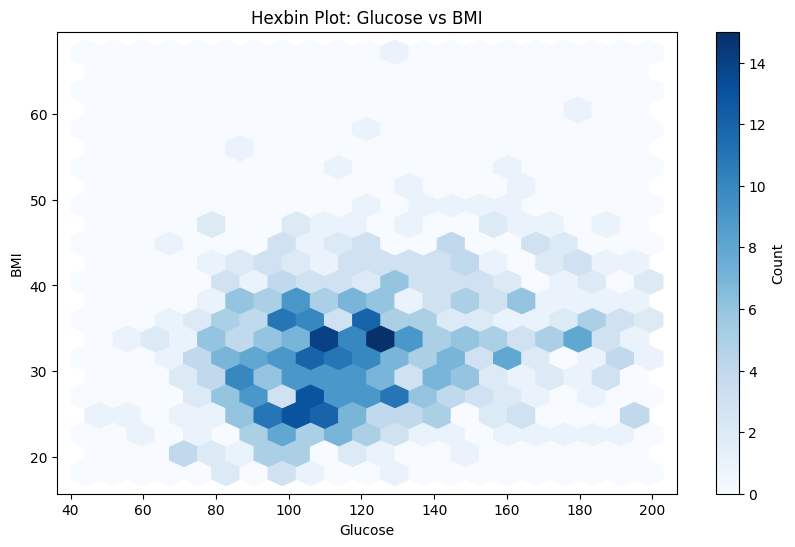

In [64]:
# Create a Hexbin Plot
plt.figure(figsize=(10, 6))
plt.hexbin(df['Glucose'], df['BMI'], gridsize=20, cmap='Blues')
plt.colorbar(label='Count')
plt.title('Hexbin Plot: Glucose vs BMI')
plt.xlabel('Glucose')
plt.ylabel('BMI')
plt.show()

<ipython-input-65-6917f788f776>:3: FutureWarning:



`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.




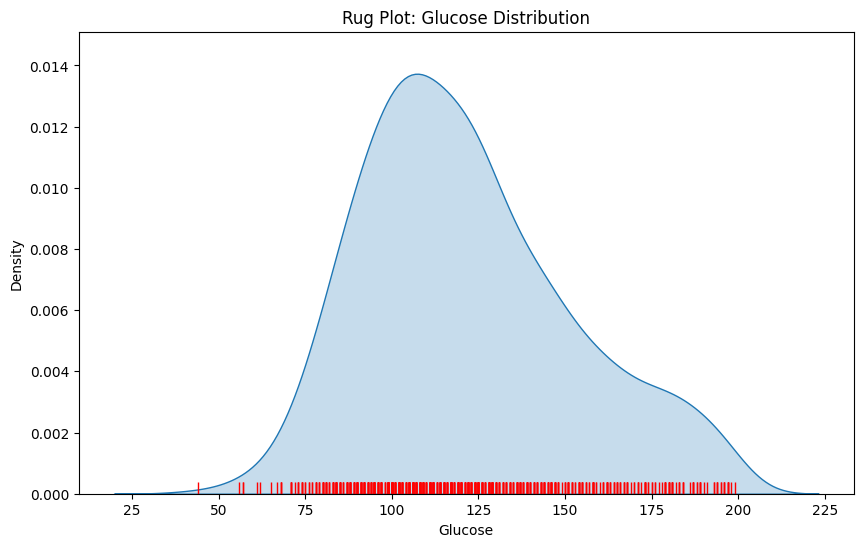

In [65]:
# Create a Rug Plot
plt.figure(figsize=(10, 6))
sns.kdeplot(df['Glucose'], shade=True)
sns.rugplot(df['Glucose'], color='red')
plt.title('Rug Plot: Glucose Distribution')
plt.show()

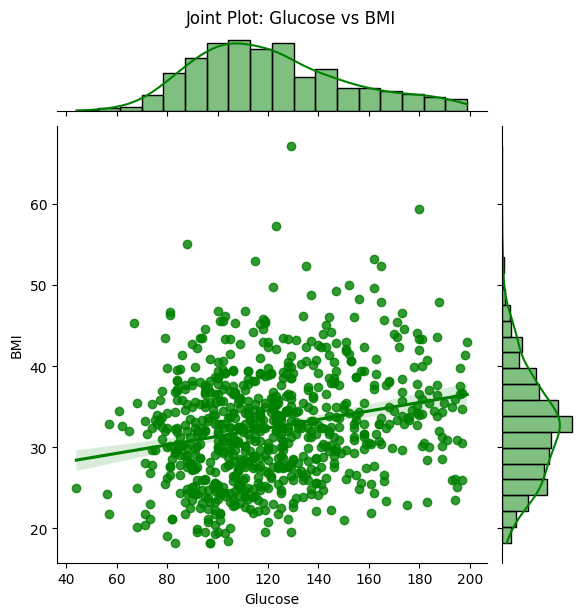

In [66]:
# Create a Joint Plot
sns.jointplot(x='Glucose', y='BMI', data=df, kind='reg', color='green')
plt.suptitle('Joint Plot: Glucose vs BMI', y=1.02)
plt.show()

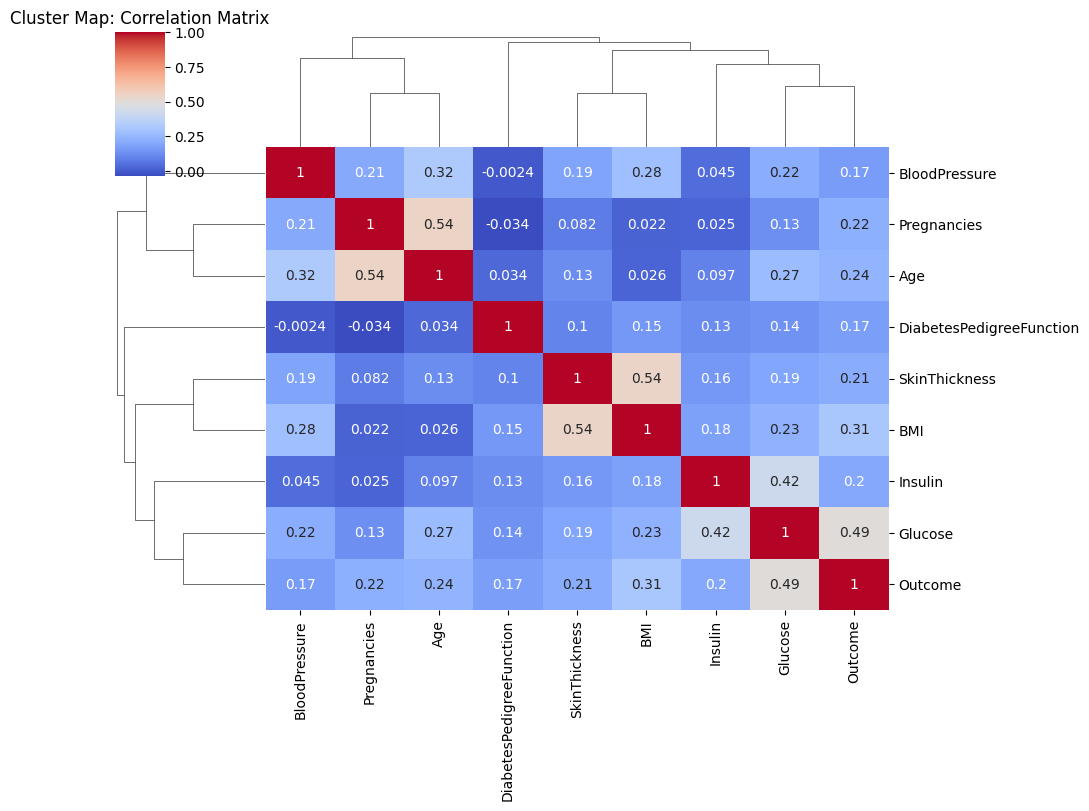

In [67]:
# Create a Cluster Map
sns.clustermap(df.corr(), annot=True, cmap='coolwarm', figsize=(10, 8))
plt.title('Cluster Map: Correlation Matrix')
plt.show()

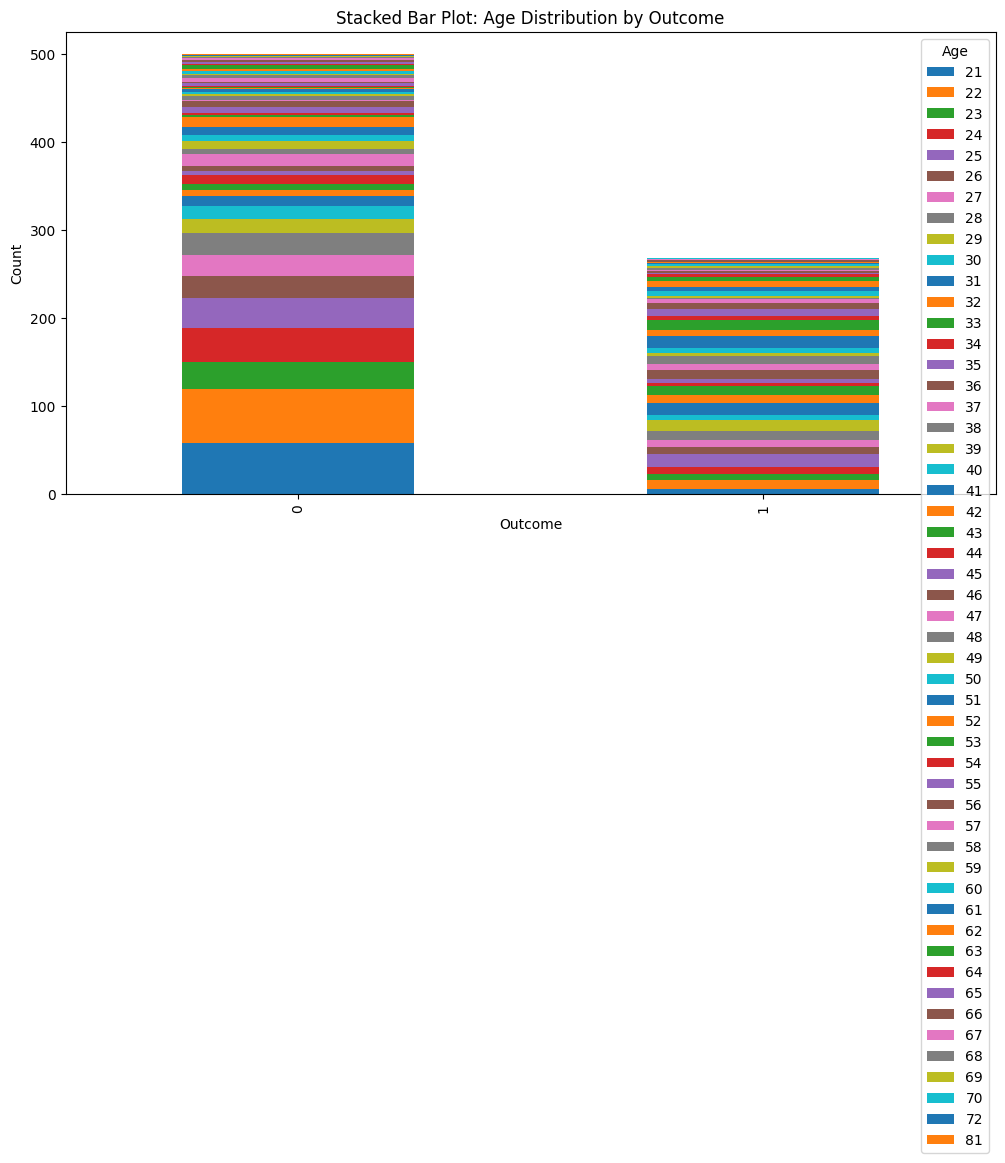

In [68]:
# Create a Stacked Bar Plot
df_grouped = df.groupby(['Outcome', 'Age']).size().unstack()
df_grouped.plot(kind='bar', stacked=True, figsize=(12, 6))
plt.title('Stacked Bar Plot: Age Distribution by Outcome')
plt.xlabel('Outcome')
plt.ylabel('Count')
plt.show()

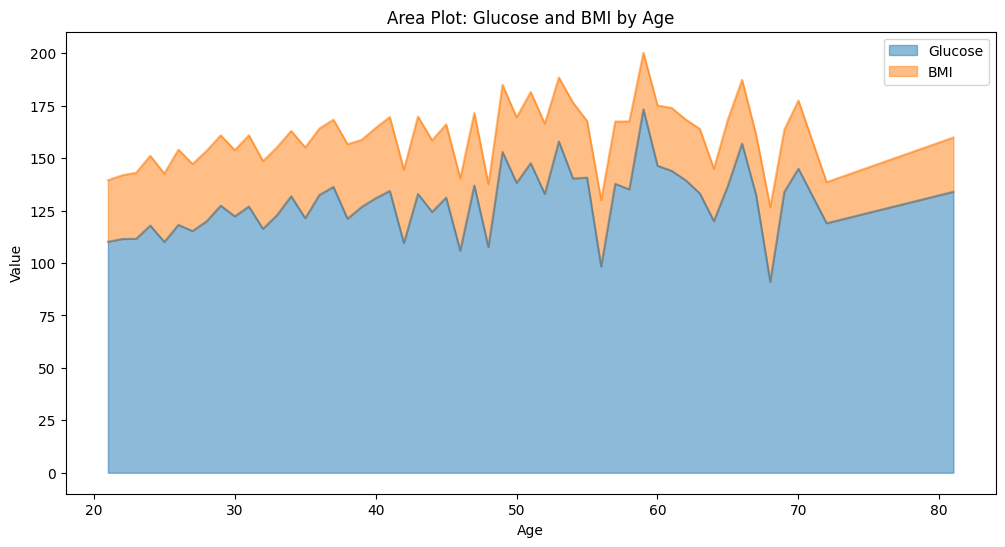

In [69]:
# Create an Area Plot
df_grouped = df.groupby('Age').mean()
df_grouped[['Glucose', 'BMI']].plot(kind='area', figsize=(12, 6), alpha=0.5)
plt.title('Area Plot: Glucose and BMI by Age')
plt.xlabel('Age')
plt.ylabel('Value')
plt.show()

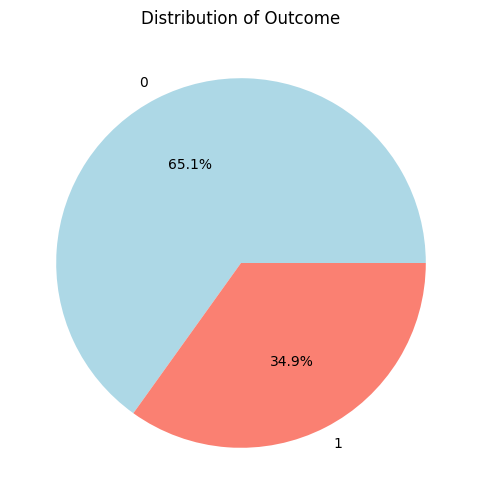

In [70]:
# Create a Pie Chart
outcome_counts = df['Outcome'].value_counts()
plt.figure(figsize=(6, 6))
plt.pie(outcome_counts, labels=outcome_counts.index, autopct='%1.1f%%', colors=['lightblue', 'salmon'])
plt.title('Distribution of Outcome')
plt.show()

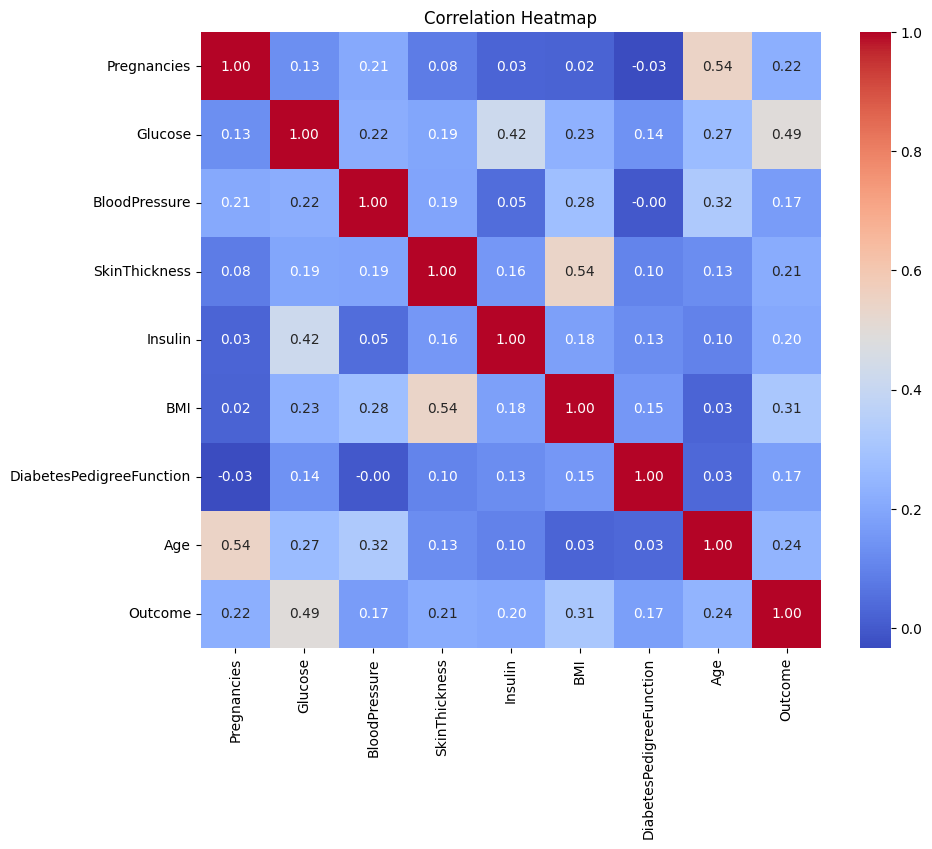

In [71]:
# Create a Heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

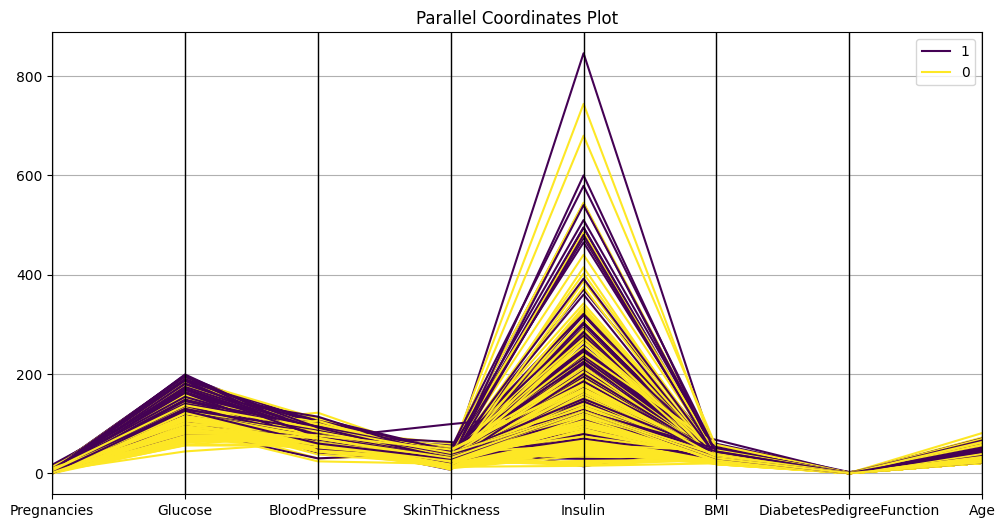

In [72]:
from pandas.plotting import parallel_coordinates

# Create a Parallel Coordinates Plot
plt.figure(figsize=(12, 6))
parallel_coordinates(df, 'Outcome', colormap='viridis')
plt.title('Parallel Coordinates Plot')
plt.show()

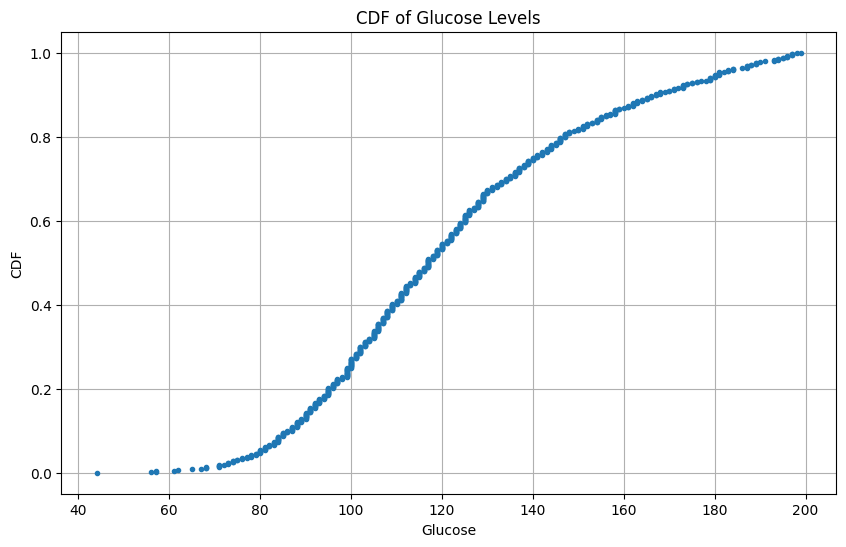

In [75]:
import numpy as np
import matplotlib.pyplot as plt

# Create a CDF plot
plt.figure(figsize=(10, 6))
sorted_glucose = np.sort(df['Glucose'])
cdf = np.arange(1, len(sorted_glucose) + 1) / len(sorted_glucose)
plt.plot(sorted_glucose, cdf, marker='.', linestyle='none')
plt.title('CDF of Glucose Levels')
plt.xlabel('Glucose')
plt.ylabel('CDF')
plt.grid(True)
plt.show()

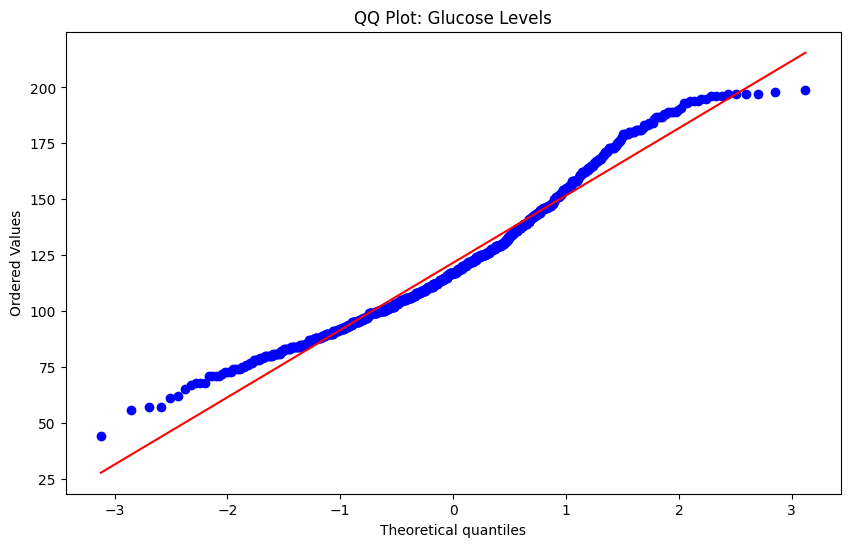

In [76]:
import scipy.stats as stats
import matplotlib.pyplot as plt

# Create a QQ Plot
plt.figure(figsize=(10, 6))
stats.probplot(df['Glucose'], dist="norm", plot=plt)
plt.title('QQ Plot: Glucose Levels')
plt.show()

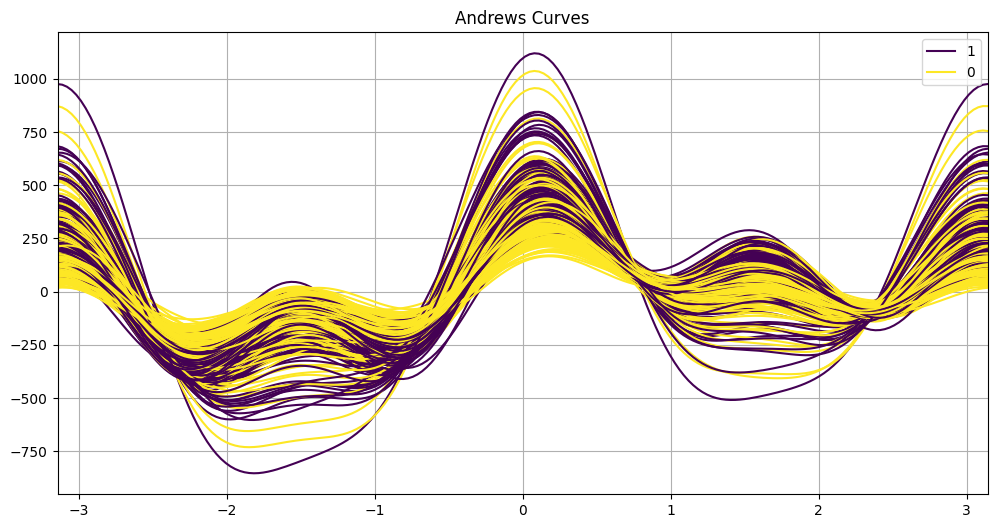

In [77]:
from pandas.plotting import andrews_curves

# Create Andrews Curves
plt.figure(figsize=(12, 6))
andrews_curves(df, 'Outcome', colormap='viridis')
plt.title('Andrews Curves')
plt.show()

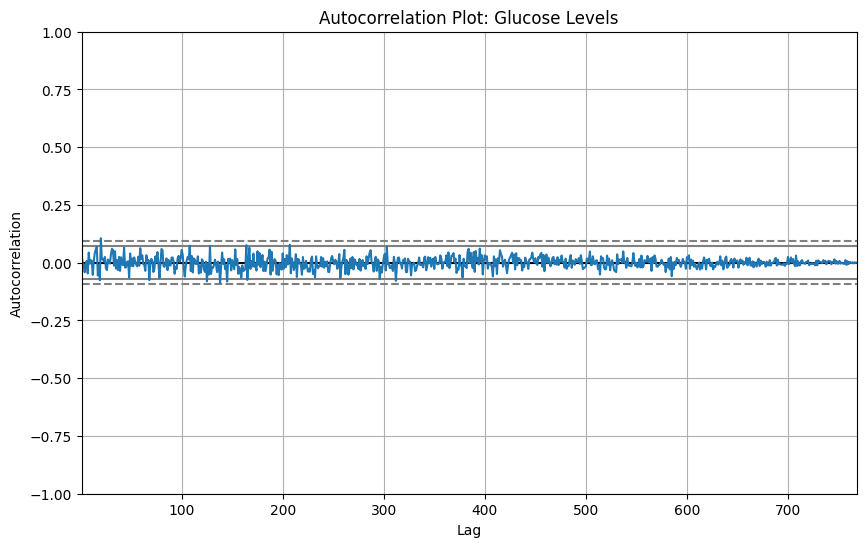

In [78]:
from pandas.plotting import autocorrelation_plot

# Create an Autocorrelation Plot
plt.figure(figsize=(10, 6))
autocorrelation_plot(df['Glucose'])
plt.title('Autocorrelation Plot: Glucose Levels')
plt.show()

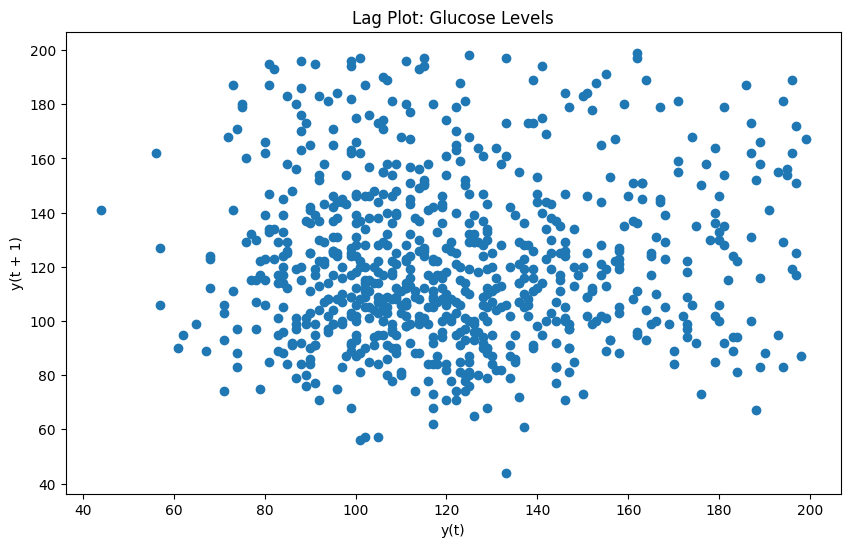

In [79]:
from pandas.plotting import lag_plot

# Create a Lag Plot
plt.figure(figsize=(10, 6))
lag_plot(df['Glucose'])
plt.title('Lag Plot: Glucose Levels')
plt.show()

<Figure size 1000x600 with 0 Axes>

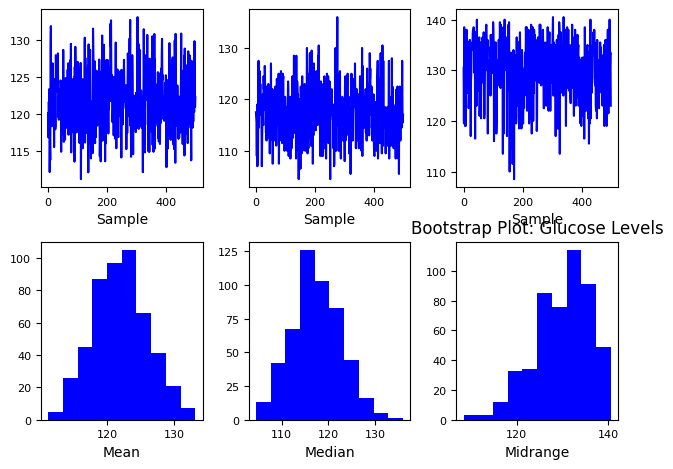

In [80]:
from pandas.plotting import bootstrap_plot

# Create a Bootstrap Plot
plt.figure(figsize=(10, 6))
bootstrap_plot(df['Glucose'], size=50, samples=500, color='blue')
plt.title('Bootstrap Plot: Glucose Levels')
plt.show()

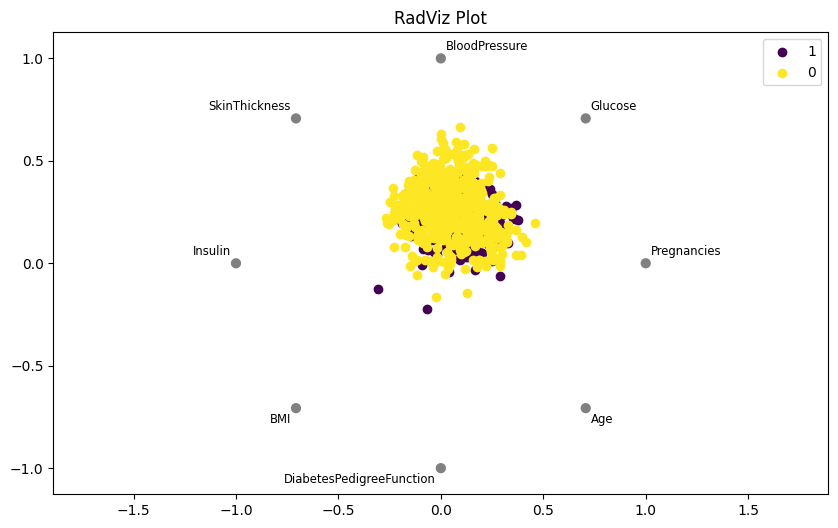

In [81]:
from pandas.plotting import radviz

# Create a RadViz Plot
plt.figure(figsize=(10, 6))
radviz(df, 'Outcome', colormap='viridis')
plt.title('RadViz Plot')
plt.show()

In [82]:
import plotly.express as px

# Create a Parallel Categories Plot
fig = px.parallel_categories(
    df,  # DataFrame
    dimensions=['Pregnancies', 'Outcome', 'Age'],  # Columns to include
    color='Outcome',  # Color by Outcome
    title='Parallel Categories Plot'
)

# Display the plot
fig.show()

In [84]:
# Create a Tree Map
fig = px.treemap(
    df,  # DataFrame
    path=['Outcome', 'Age'],  # Hierarchy: Outcome -> Age
    values='Glucose',  # Values: Glucose
    title='Tree Map: Glucose by Outcome and Age'
)

# Display the plot
fig.show()

In [86]:
# Create an Area Chart
fig = px.area(
    df,  # DataFrame
    x='Age',  # X-axis: Age
    y='Glucose',  # Y-axis: Glucose
    color='Outcome',  # Color by Outcome
    title='Area Chart: Glucose vs Age by Outcome'
)

# Display the plot
fig.show()

In [87]:
# Separate the features (X) and target variable (y)
X = df_log_transformed.drop(columns=['DiabetesPedigreeFunction', 'Outcome'])  # Features
y = df_log_transformed['DiabetesPedigreeFunction']  # Target variable

In [88]:
# Import the train_test_split function from scikit-learn
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X,  # Features (independent variables)
    y,  # Target variable (dependent variable)
    test_size=0.2,  # 20% of the data will be used for testing
    random_state=42  # Seed for reproducibility
)

In [89]:
# Import the LinearRegression class from scikit-learn
from sklearn.linear_model import LinearRegression

# Import the mean_squared_error function from scikit-learn
from sklearn.metrics import mean_squared_error

In [90]:
# Initialize the LinearRegression model
linear_reg_model = LinearRegression()

# Train the model on the training data
linear_reg_model.fit(X_train, y_train)

LinearRegression()

In [91]:
# Use the trained linear regression model to make predictions on the test data
y_pred_linear = linear_reg_model.predict(X_test)

In [92]:
# Calculate the Mean Squared Error (MSE) for the linear regression model
mse_linear = mean_squared_error(y_test, y_pred_linear)

# Print the MSE
print(f"Linear Regression MSE: {mse_linear}")

Linear Regression MSE: 0.09866369126878094


In [93]:
# Import the PolynomialFeatures class from scikit-learn
from sklearn.preprocessing import PolynomialFeatures

In [94]:
# Initialize PolynomialFeatures with degree=2 (quadratic features)
poly = PolynomialFeatures(degree=2)  # degree=2 for simplicity

# Transform the training features into polynomial features
X_poly_train = poly.fit_transform(X_train)

# Transform the test features into polynomial features
X_poly_test = poly.transform(X_test)

In [95]:
# Initialize the LinearRegression model
poly_reg_model = LinearRegression()

# Train the model on the polynomial features of the training data
poly_reg_model.fit(X_poly_train, y_train)

LinearRegression()

In [96]:
# Use the trained polynomial regression model to make predictions on the test data
y_pred_poly = poly_reg_model.predict(X_poly_test)

# Calculate the Mean Squared Error (MSE) for the polynomial regression model
mse_poly = mean_squared_error(y_test, y_pred_poly)

# Print the MSE
print(f"Polynomial Regression MSE: {mse_poly}")

Polynomial Regression MSE: 0.20473948135931472


In [97]:
# Import the Lasso class from scikit-learn
from sklearn.linear_model import Lasso

In [98]:
# Initialize the Lasso model with a regularization parameter (alpha=0.1)
lasso_model = Lasso(alpha=0.1)

# Train the model on the training data
lasso_model.fit(X_train, y_train)

Lasso(alpha=0.1)

In [99]:
# Use the trained Lasso regression model to make predictions on the test data
y_pred_lasso = lasso_model.predict(X_test)

# Calculate the Mean Squared Error (MSE) for the Lasso regression model
mse_lasso = mean_squared_error(y_test, y_pred_lasso)

# Print the MSE
print(f"Lasso Regression MSE: {mse_lasso}")

Lasso Regression MSE: 0.09212414091077874


In [100]:
# Import the Ridge class from scikit-learn
from sklearn.linear_model import Ridge

In [101]:
# Initialize the Ridge model with a regularization parameter (alpha=1.0)
ridge_model = Ridge(alpha=1.0)

# Train the model on the training data
ridge_model.fit(X_train, y_train)

Ridge()

In [102]:
# Use the trained Ridge regression model to make predictions on the test data
y_pred_ridge = ridge_model.predict(X_test)

# Calculate the Mean Squared Error (MSE) for the Ridge regression model
mse_ridge = mean_squared_error(y_test, y_pred_ridge)

# Print the MSE
print(f"Ridge Regression MSE: {mse_ridge}")

Ridge Regression MSE: 0.09385151487011875


In [103]:
# Print the Mean Squared Error (MSE) for all models
print(f"Linear Regression MSE: {mse_linear}")
print(f"Polynomial Regression MSE: {mse_poly}")
print(f"Lasso Regression MSE: {mse_lasso}")
print(f"Ridge Regression MSE: {mse_ridge}")

Linear Regression MSE: 0.09866369126878094
Polynomial Regression MSE: 0.20473948135931472
Lasso Regression MSE: 0.09212414091077874
Ridge Regression MSE: 0.09385151487011875


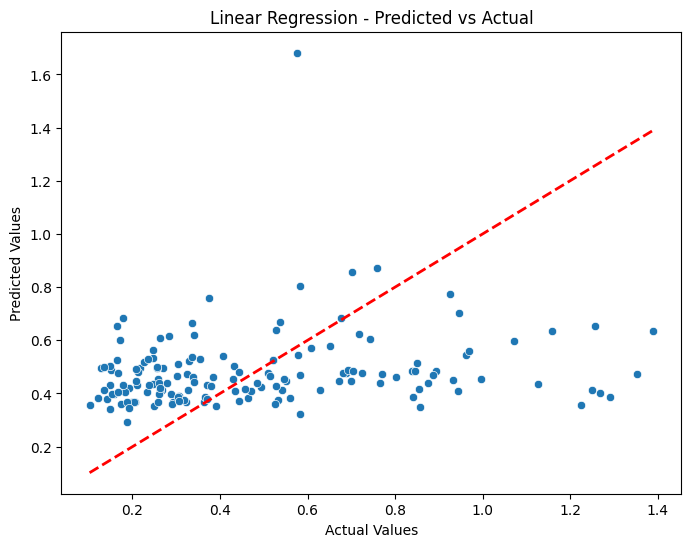

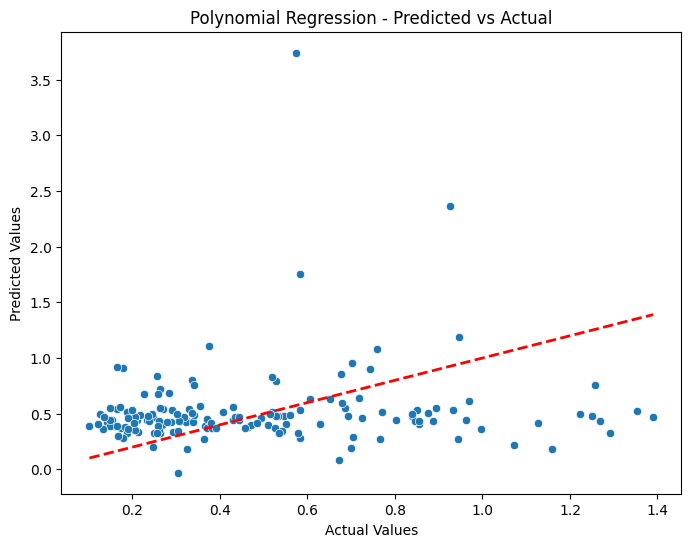

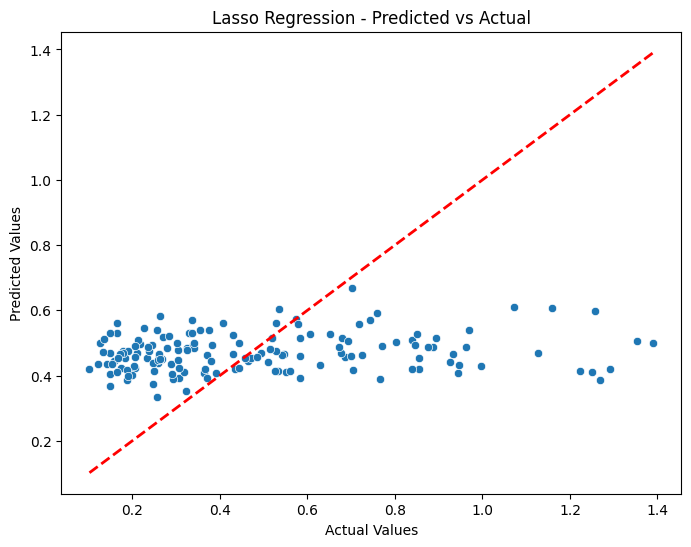

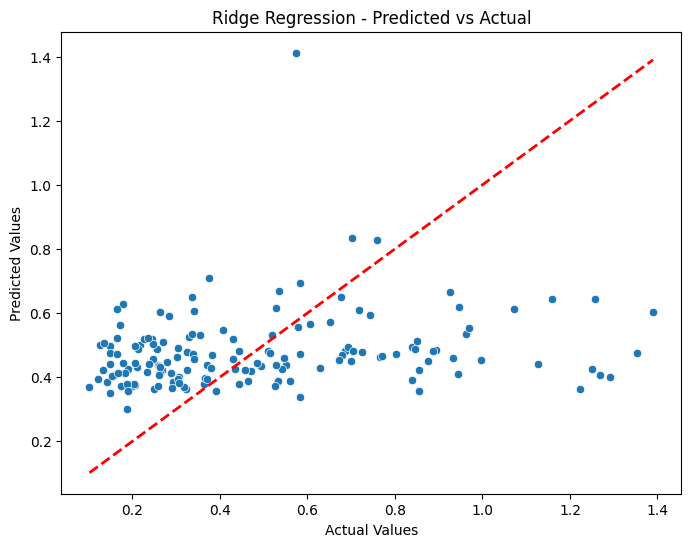

In [104]:
# Define a function to plot predicted vs actual values
def plot_predicted_vs_actual(y_true, y_pred, model_name):
    plt.figure(figsize=(8, 6))  # Set the figure size
    sns.scatterplot(x=y_true, y=y_pred)  # Create a scatter plot of actual vs predicted values
    plt.plot([y_true.min(), y_true.max()], [y_true.min(), y_true.max()], '--r', linewidth=2)  # Add a diagonal reference line
    plt.xlabel('Actual Values')  # Label for the x-axis
    plt.ylabel('Predicted Values')  # Label for the y-axis
    plt.title(f'{model_name} - Predicted vs Actual')  # Title of the plot
    plt.show()  # Display the plot

# Plot for Linear Regression
plot_predicted_vs_actual(y_test, y_pred_linear, "Linear Regression")

# Plot for Polynomial Regression
plot_predicted_vs_actual(y_test, y_pred_poly, "Polynomial Regression")

# Plot for Lasso Regression
plot_predicted_vs_actual(y_test, y_pred_lasso, "Lasso Regression")

# Plot for Ridge Regression
plot_predicted_vs_actual(y_test, y_pred_ridge, "Ridge Regression")